In [1]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [2]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(["B", "M"])

array([0, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

print("Test Accuracy: %.3f" % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [6]:
from sklearn import set_config

set_config(display='diagram')

In [7]:
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [9]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f"Fold: {k+1}, Class Distribution: {np.bincount(y_train[train])}, Accuracy: {score}")

Fold: 1, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 2, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 3, Class Distribution: [256 153], Accuracy: 0.9565217391304348
Fold: 4, Class Distribution: [256 153], Accuracy: 0.9565217391304348
Fold: 5, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 6, Class Distribution: [257 153], Accuracy: 0.9555555555555556
Fold: 7, Class Distribution: [257 153], Accuracy: 0.9777777777777777
Fold: 8, Class Distribution: [257 153], Accuracy: 0.9333333333333333
Fold: 9, Class Distribution: [257 153], Accuracy: 0.9555555555555556
Fold: 10, Class Distribution: [257 153], Accuracy: 0.9555555555555556


In [10]:
print(f"CV Accuracy: {np.mean(scores)} +/- {np.std(scores)}")

CV Accuracy: 0.9495169082125603 +/- 0.013854294239660376


In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
scores = cross_val_score(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1
)

print(f"CV Score: {scores}")
print(f"CV Accuracy: {np.mean(scores):.2f} +/- {np.std(scores):.3f}")

CV Score: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV Accuracy: 0.95 +/- 0.014


In [13]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    scoring=['accuracy'],
    cv=10,
    n_jobs=-1,
)

print(f"CV Score: {scores}")
print(f"CV Accuracy: {np.mean(scores['test_accuracy']):.2f} +/- {np.std(scores['test_accuracy']):.3f}")

CV Score: {'fit_time': array([0.01388836, 0.01290655, 0.01712346, 0.01195717, 0.01596689,
       0.01195669, 0.02841902, 0.02902889, 0.01180553, 0.01372099]), 'score_time': array([0.00820208, 0.00103426, 0.00109839, 0.00111985, 0.00102234,
       0.00101161, 0.00106239, 0.0011189 , 0.00106907, 0.00103617]), 'test_accuracy': array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])}
CV Accuracy: 0.95 +/- 0.014


In [14]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1,
)

preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [15]:
preds = cross_val_predict(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    method='predict_proba',
    n_jobs=-1,
)

preds[:10]

array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])

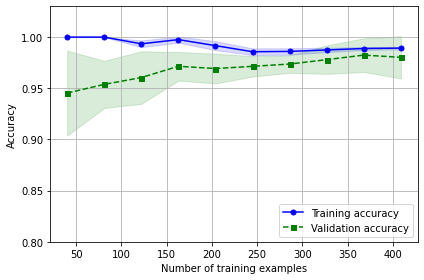

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2',
                       random_state=1,
                       max_iter=10000)
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
    train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy'
)

plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue'
)

plt.plot(
    train_sizes, test_mean,
    color='green', linestyle='--', marker='s',
    markersize=5, label='Validation accuracy'
)

plt.fill_between(
    train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green'
)

plt.grid()
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

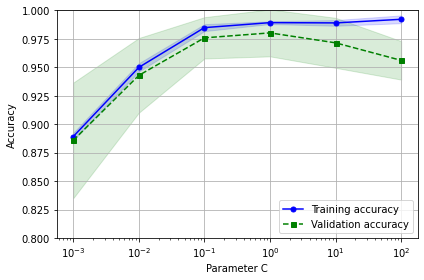

In [17]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

param_range = [.0001, .001, .01, .1, 1., 10., 100., 1000.]

param_grid = [
    {
        'svc__C': param_range,
        'svc__kernel': ['linear']
     },
     {
        'svc__C': param_range,
        'svc__gamma': param_range,
        'svc__kernel': ['rbf']
     }
]

gs = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    scoring='accuracy',
    refit=True,
    cv=10,
    n_jobs=-1
)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [19]:
clf = gs.best_estimator_

print(f"Test Accuracy: {clf.score(X_test, y_test):.3f}")

Test Accuracy: 0.974


In [20]:
gs = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    return_train_score=True,
    n_jobs=-1
)

gs = gs.fit(X_train, y_train)

In [21]:
gs.cv_results_["split0_train_score"]

array([0.6405868 , 0.93643032, 0.97555012, 0.98777506, 0.98533007,
       0.99266504, 0.99755501, 1.        , 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.7799511 , 0.94621027,
       0.96577017, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.78484108, 0.94621027, 0.9804401 , 0.99266504, 1.        ,
       1.        , 1.        , 1.        , 0.94621027, 0.97799511,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97799511, 0.98777506, 0.99511002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98533007,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [22]:
gs.cv_results_["mean_train_score"]

array([0.6402928 , 0.93724074, 0.97240801, 0.98510406, 0.98803447,
       0.99145447, 0.99707019, 0.9992677 , 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.77070249, 0.94700817,
       0.97167094, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.77949371, 0.94725326, 0.97704753, 0.99291848, 1.        ,
       1.        , 1.        , 1.        , 0.94652096, 0.97753354,
       0.99023257, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97680064, 0.98852287, 0.99755799, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98803387,
       0.99291848, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [23]:
gs.cv_results_["split0_test_score"]

array([0.63043478, 0.89130435, 0.95652174, 0.97826087, 0.95652174,
       0.93478261, 0.95652174, 0.93478261, 0.63043478, 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.63043478, 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.63043478, 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.63043478, 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.63043478, 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.69565217, 0.93478261,
       0.95652174, 0.63043478, 0.63043478, 0.63043478, 0.63043478,
       0.69565217, 0.93478261, 0.93478261, 1.        , 0.63043478,
       0.63043478, 0.63043478, 0.63043478, 0.93478261, 0.97826087,
       1.        , 1.        , 0.63043478, 0.63043478, 0.63043478,
       0.63043478, 0.97826087, 0.97826087, 0.97826087, 1.        ,
       0.63043478, 0.63043478, 0.63043478, 0.63043478, 0.97826087,
       0.95652174, 0.95652174, 1.        , 0.63043478, 0.63043478,
       0.63043478, 0.63043478])

In [24]:
print(f"Test Accuracy: {gs.score(X_test, y_test):.3f}")

Test Accuracy: 0.974


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

distribution = loguniform(.0001, 1000.)

param_dist = [
    {
        'svc__C': distribution,
        'svc__kernel': ['linear'],
    },
    {
        'svc__C': distribution,
        'svc__gamma': distribution,
        'svc__kernel': ['rbf'],
    }
]

rs = RandomizedSearchCV(
    estimator=pipe_svc,
    param_distributions=param_dist,
    n_iter=30,
    cv=10,
    random_state=1,
    n_jobs=-1,
)

rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9824637681159419
{'svc__C': 210.6644070836221, 'svc__gamma': 0.0006861724481510375, 'svc__kernel': 'rbf'}


In [26]:
from IPython.display import Image

Image(url="https://git.io/JtsTP", width=500)

In [27]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

hgs = HalvingGridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    verbose=1
)

hgs = hgs.fit(X_train, y_train)

print(hgs.best_score_)
print(hgs.best_params_)

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 40
max_resources_: 455
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 40
Fitting 10 folds for each of 72 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 24
n_resources: 120
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 8
n_resources: 360
Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.983095238095238
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [28]:
print(np.sum(hgs.cv_results_["mean_fit_time"]))

0.37979738712310795


In [29]:
print(f"자원 리스트: {hgs.n_resources_}")
print(f"후보 리스트: {hgs.n_candidates_}")

자원 리스트: [40, 120, 360]
후보 리스트: [72, 24, 8]


In [30]:
gs = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2
)

scores = cross_val_score(
    gs, X_train, y_train,
    scoring='accuracy', cv=5
)

print(f"CV Accuracy: {np.mean(scores): .3f} +/- {np.std(scores):.3f}")

CV Accuracy:  0.974 +/- 0.015


In [31]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[
        {
            "max_depth": [1, 2, 3, 4, 5, 6, 7, None]
        }
    ],
    scoring='accuracy',
    cv=2
)

scores = cross_val_score(
    gs, X_train, y_train,
    scoring='accuracy', cv=5
)

print(f"CV Accuracy: {np.mean(scores): .3f} +/- {np.std(scores):.3f}")

CV Accuracy:  0.934 +/- 0.016


In [32]:
Image(url="https://git.io/JtsT1", width=300)

In [33]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

[[71  1]
 [ 2 40]]


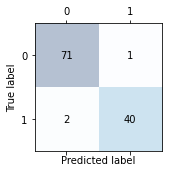

In [34]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()

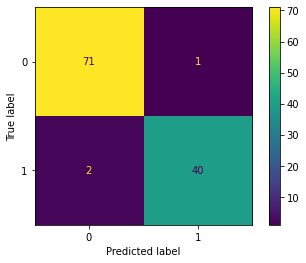

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test)

plt.show()

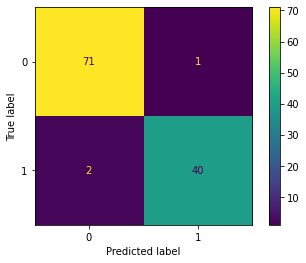

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

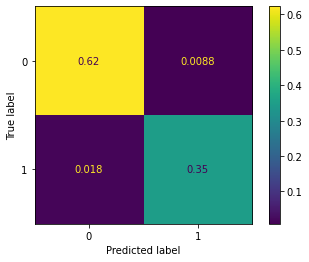

In [37]:
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, normalize='all')
plt.show()

In [38]:
le.transform(["M", "B"])

array([1, 0])

In [39]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


In [40]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_true=y_test, y_pred=y_pred):.3f}")
print(f"Recall: {recall_score(y_true=y_test, y_pred=y_pred):.3f}")
print(f"F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}")

Precision: 0.976
Recall: 0.952
F1: 0.964


In [42]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [.01, .1, 1., 10.]

prarm_grid = [
    {
        'svc__C': c_gamma_range,
        'svc__kernel': ['linear'],
    },
    {
        'svc__C': c_gamma_range,
        'svc__gamma': c_gamma_range,
        'svc__kernel': ['rbf'],
    }
]

gs = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    scoring=scorer,
    cv=10,
    n_jobs=-1
)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9880771478667446
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
